In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# for Geo visualization import folium
import folium

In [ ]:
# canging the figure size and and the graph style
plt.rcParams["figure.figsize"]=(10,5)
plt.style.use("ggplot")

In [ ]:
# increase the rows and columns range limit
pd.options.display.max_rows=100
pd.options.display.max_columns=300

In [ ]:
# EDA - Supermarket Sales
"""
## 1.  Introduction

This case study presents a real world alike scenario where important decisions are influenced by the data driven insights.
 We'll explore the transaction level data sales data of a supermarket chain , and derive useful business insights.

### Objective

The supermarket chain wants to run some promotions and they have a fixed budget for the same. Business wants insights from the data on how to most efficiently allocate these funds.

The objectives are as following -

•	Provide insights to Marketing head for allocating funds. The funds should be allocated in such a way so that the promotional return can be maximized.

•	Any new Strategy or strategy changes suggestions to improve revenue.

### Data 

•	The data belongs to a supermarket chain in Myanmar, with stores in 3 cities.

•	This is a sampled data of 1000 transactions and 20 fields for each transaction

•	All transactions belong to year 2019
"""

"\n## 1.  Introduction\n\nThis case study presents a real world alike scenario where important decisions are influenced by the data driven insights.\n We'll explore the transaction level data sales data of a supermarket chain , and derive useful business insights.\n\n### Objective\n\nThe supermarket chain wants to run some promotions and they have a fixed budget for the same. Business wants insights from the data on how to most efficiently allocate these funds.\n\nThe objectives are as following -\n\n•\tProvide insights to Marketing head for allocating funds. The funds should be allocated in such a way so that the promotional return can be maximized.\n\n•\tAny new Strategy or strategy changes suggestions to improve revenue.\n\n### Data \n\n•\tThe data belongs to a supermarket chain in Myanmar, with stores in 3 cities.\n\n•\tThis is a sampled data of 1000 transactions and 20 fields for each transaction\n\n•\tAll transactions belong to year 2019\n"

In [ ]:
# load the supermarket sales data
sales_data=pd.read_csv("/content/supermarket_sales.csv")
sales_data.head(5)

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


In [ ]:
# to know about the data
data_dict=pd.read_csv("/content/data_dict.csv")
data_dict

,Field,Description
0,Invoice ID,Invoice ID of the transaction
1,Branch,One out of 3 branches. Every city belongs to a...
2,CustomerID,Customer ID of the cutomer doing transaction
3,City,City where the tx took place. The chain has st...
4,Customer Type,Where a member or normal customer
5,Gender,Male or Female
6,Product Line,Product line of the product purchased
7,Unit Price,Unit price of product purchased
8,Quantity,Qty purchased
9,Tax 5%,Tax as a fixed % of invoice


In [ ]:
# to know about the statistical fields
sales_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
count,1000.000000,1000.000000,896.000000,1000.000000,1000.000000,1000.000000,1000.000000,857.000000,1000.000000,1000.000000
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,0.000000,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905,874.980000,10.000000,96.173500,21.958800


In [ ]:
# apply conditional formating on the numerical field
sales_data.head(20).style.background_gradient(cmap="hot")

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.690000,10,37.345000,746.900000,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.173500,16.840900
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.280000,6,4.584000,91.680000,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.078500,19.763300
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.330000,7,16.215500,324.310000,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.173500,16.840900
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.220000,11,32.021000,640.420000,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.173500,16.840900
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.310000,7,30.208500,604.170000,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,nan,96.173500,16.840900
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.390000,8,34.156000,683.120000,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,nan,96.078500,19.763300
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.840000,6,20.652000,413.040000,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,nan,96.173500,16.840900
7,315-22-5665,C,C1471,Naypyitaw,nan,Female,Health and beauty,73.560000,12,44.136000,882.720000,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,nan,96.078500,19.763300
8,665-32-9167,A,C1707,Yangon,nan,Female,Health and beauty,36.260000,2,3.626000,72.520000,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,nan,96.173500,16.840900
9,692-92-5582,B,C1277,Mandalay,nan,Female,Health and beauty,54.840000,4,10.968000,219.360000,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,nan,96.089100,21.958800


In [ ]:
# checking the numbers of null values
sales_data.isnull().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type               48
Gender                      25
Product line                23
Unit price                   0
Quantity                     0
Tax 5%                     104
Total                        0
Date                         0
Time                         0
Payment                     21
cogs                         0
gross margin percentage      0
gross income                 0
Rating                     143
Longitude                    0
Latitude                     0
dtype: int64

In [ ]:
# we having seven fields of null values and the branch column has the maximum number of null values

In [ ]:
# impuiting the null values of ratings columns with the mean
sales_data_2=sales_data.copy()

In [ ]:
sales_data_2.Rating.mean()

7.462625437572928

In [ ]:
# fill the null values
sales_data_2["Rating"]=sales_data_2["Rating"].fillna(sales_data_2.Rating.mean())

In [ ]:
# verifying
sales_data_2.isnull().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type               48
Gender                      25
Product line                23
Unit price                   0
Quantity                     0
Tax 5%                     104
Total                        0
Date                         0
Time                         0
Payment                     21
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
Longitude                    0
Latitude                     0
dtype: int64

In [ ]:
# imputing the null values of the tax column
sales_data_2["Tax 5%"]=sales_data_2["Tax 5%"].fillna(sales_data_2.Total*0.05)

In [ ]:
sales_data_2.isnull().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type               48
Gender                      25
Product line                23
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                     21
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
Longitude                    0
Latitude                     0
dtype: int64

In [ ]:
# rest of the null values columns are have to fill with the mode of that columns

In [ ]:
# defining a function to do that in simultaneously
def impute_mode(col):
  sales_data_2[col]=sales_data_2[col].fillna(sales_data_2[col].mode()[0])

In [ ]:
# imputing the customer type,Gender,product line and payment with that function

In [ ]:
impute_mode("Customer type")

In [ ]:
impute_mode("Gender")

In [ ]:
impute_mode("Product line")

In [ ]:
impute_mode("Payment")

In [ ]:
# verifying again
sales_data_2.isnull().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type                0
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                      0
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
Longitude                    0
Latitude                     0
dtype: int64

In [ ]:
# imputing the null values of Branch column
sales_data_2.groupby(["Branch","City"]).agg({"Gender":"count"})

,,Gender
Branch,City,
A,Yangon,281
B,Mandalay,265
C,Naypyitaw,260


In [ ]:
sales_data_2[["Branch","City"]].drop_duplicates()

,Branch,City
0,A,Yangon
1,C,Naypyitaw
9,B,Mandalay
178,NaN,Yangon
179,NaN,Naypyitaw
185,NaN,Mandalay


In [ ]:
# imputing the null values according the city
for i in range(0,len(sales_data_2["Branch"])):
  if pd.isna(sales_data_2["Branch"][i])==True:
    if(sales_data_2["City"][i].strip()=="Yangon"):
      sales_data_2["Branch"][i]="A"

    elif(sales_data_2["City"][i].strip()=="Mandalay"):
      sales_data_2["Branch"][i]="B"

    elif(sales_data_2["City"][i].strip()=="Naypyitaw"):
      sales_data_2["Branch"][i]="C"

    else:
      print("invalid city")

<ipython-input-28-0e4504d7829b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2["Branch"][i]="A"
<ipython-input-28-0e4504d7829b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2["Branch"][i]="C"
<ipython-input-28-0e4504d7829b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2["Branch"][i]="B"


In [ ]:
# verifying that
sales_data_2.isnull().sum()

Invoice ID                 0
Branch                     0
CustomerID                 0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Longitude                  0
Latitude                   0
dtype: int64

In [ ]:
# convert the date column into date time column
sales_data_2.Date=pd.to_datetime(sales_data_2.Date)

In [ ]:
# add a momnth,day and weekday column
sales_data_2["Month"]=sales_data_2.Date.dt.month
sales_data_2["Day"]=sales_data_2.Date.dt.day
sales_data_2["Weekday"]=sales_data_2.Date.dt.day_name()

### univariate Analysis

In [ ]:
def univariate_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=1,figsize=(10,6))                     # Defining 2 subplots, changing fig size
    axes[1].set_title( "Strip-plot of "+ col , size =14)                          # Chart title for Subplot 1
    sns.stripplot(sales_data_2[col],ax=axes[1], color="#4CB391")                 # Distplot in subplot 1


    axes[0].set_title("Violinplot for  " + col )                                 #  Title for Subplot 2
    sns.violinplot(sales_data_2[col],ax=axes[0], color="grey")                   # Violinplot in Subplot 2
    
                      
    plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


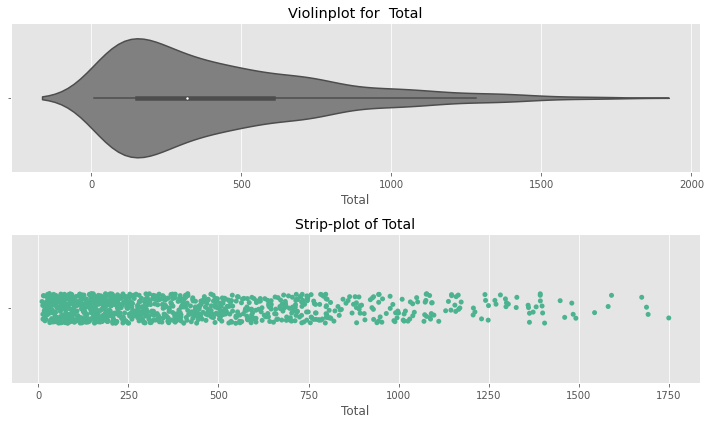

In [ ]:
univariate_quant("Total")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


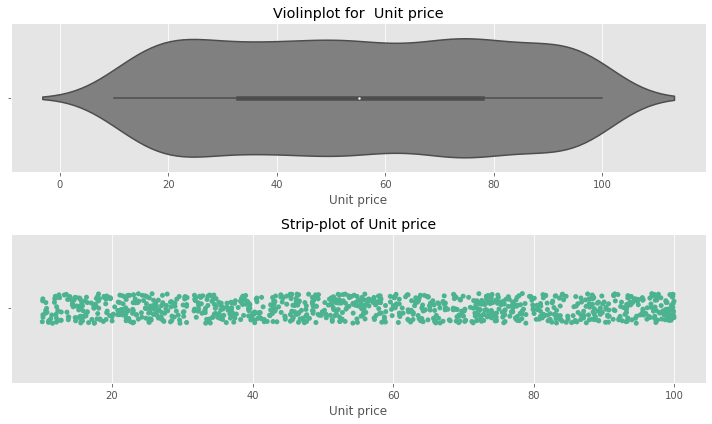

In [ ]:

univariate_quant("Unit price")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


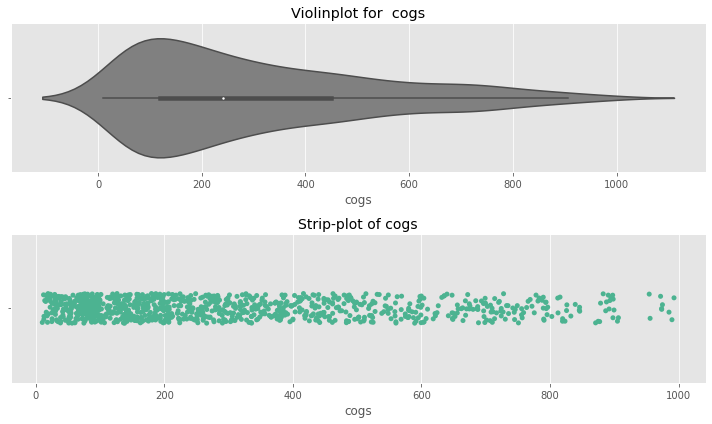

In [ ]:
univariate_quant("cogs")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


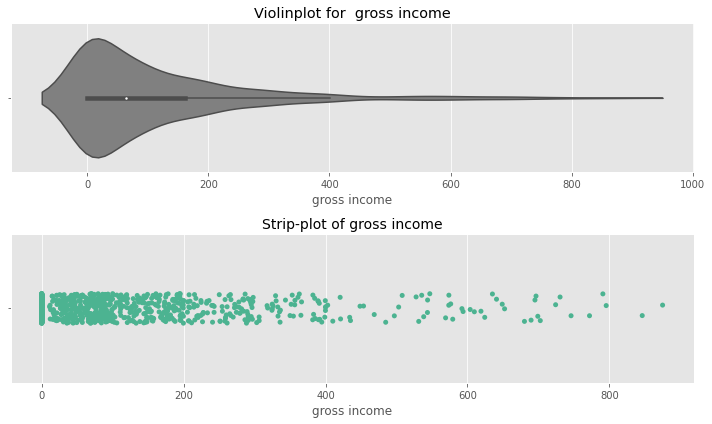

In [ ]:
univariate_quant("gross income")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


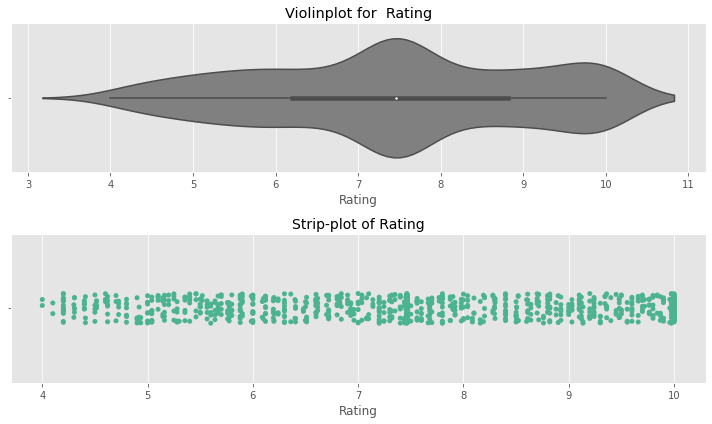

In [ ]:
univariate_quant("Rating")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


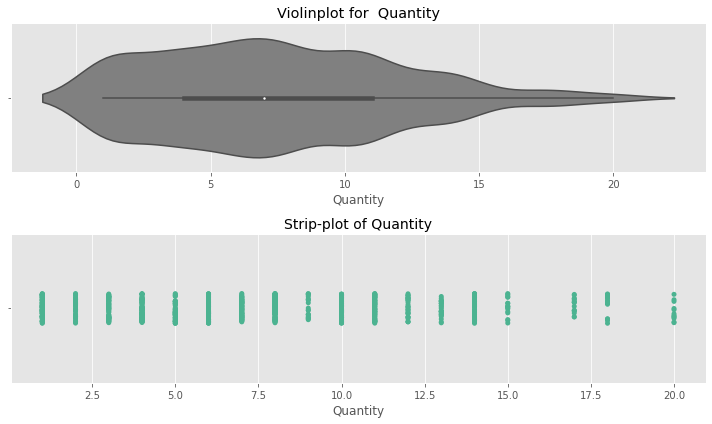

In [ ]:
univariate_quant("Quantity")

## Categorical columns analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


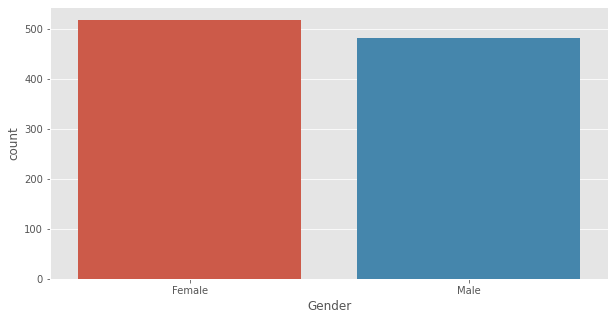

In [ ]:
# analyze the Gender wise customers
sns.countplot(sales_data_2.Gender)

In [ ]:
# from the above chart we have observed that there are more males customers 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


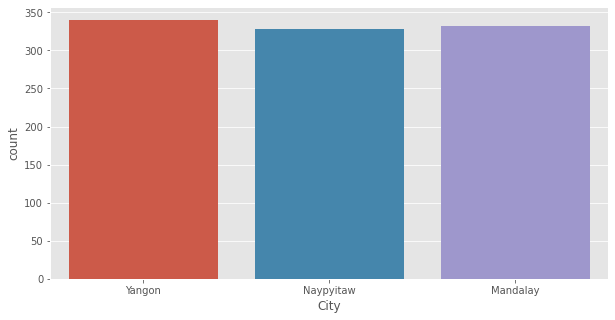

In [ ]:
# analyse the city wise number of customers
sns.countplot(sales_data_2.City)

In [ ]:
# from the above chart we have observed that most of the customers are from Yangon city

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


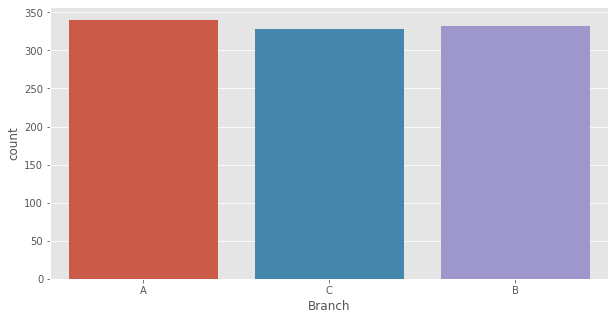

In [ ]:
# analyse the branch wise customers
sns.countplot(sales_data_2.Branch)

In [ ]:
# most of the customers are from the Branch A

In [ ]:
sales_data_2.head(3)

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,Month,Day,Weekday
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,2019-02-21,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409,2,21,Thursday
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,2019-05-27,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633,5,27,Monday
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,2019-12-27,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409,12,27,Friday


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


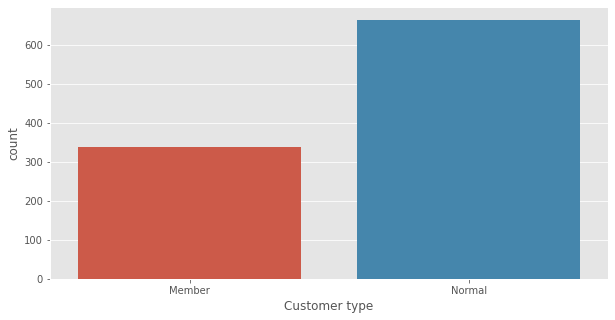

In [ ]:
# Analyse the no of customers from each customer type
sns.countplot(sales_data_2["Customer type"])

In [ ]:
# from the above chart we have observed that almost 2/3rd of the customers are not members

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

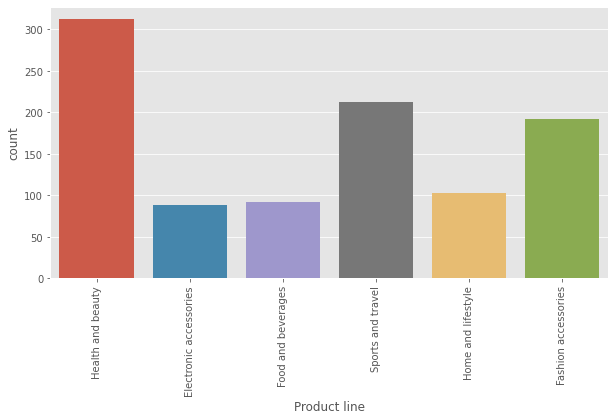

In [ ]:
# analyse the product line column
sns.countplot(sales_data_2["Product line"])
plt.xticks(rotation=90)

In [ ]:
# from the above chart we have observed that most of the customers purchases the Health and Beauty products

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


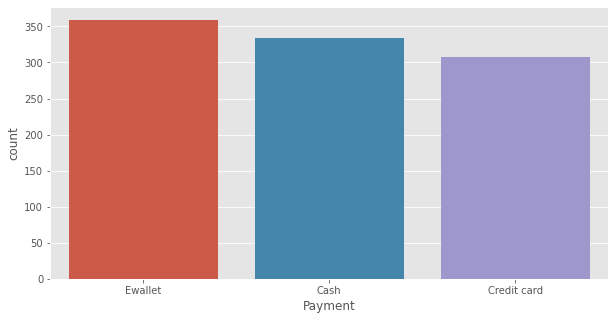

In [ ]:
# Analyse the payment column
sns.countplot(sales_data_2.Payment)

In [ ]:
# from the above chart we have observed that maximum peoples choose the Ewallet for payment

## Geographical Map

In [ ]:
Cities_geo=sales_data_2[["City","Longitude","Latitude"]].drop_duplicates()

In [ ]:
for (i,j) in Cities_geo.iterrows():
  print(i)
  print("\n",j)

0

 City          Yangon
Longitude    96.1735
Latitude     16.8409
Name: 0, dtype: object
1

 City         Naypyitaw
Longitude      96.0785
Latitude       19.7633
Name: 1, dtype: object
9

 City         Mandalay
Longitude     96.0891
Latitude      21.9588
Name: 9, dtype: object


In [ ]:
# map the location
geo_map = folium.Map(location =[16.8409,96.1735], zoom_start = 5,
                     width = 1000, height = 500,
                     tiles = 'CartoDB Positron', control_scale = True)

for (i, j) in Cities_geo.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['City'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(geo_map)

geo_map


In [ ]:
"""Insights - 

The cities are distributed across lengths of Myanmar and are not close to each other. 

Yangon is the only coastal city where the chain is present, other ones are located in the middle of Myanmar. 

Company can expand in North and East of Myanmar as there is no presence in those areas. 

Also, a big coastal city Sittwe is also an option for later expansion.
"""


'Insights - \n\nThe cities are distributed across lengths of Myanmar and are not close to each other. \n\nYangon is the only coastal city where the chain is present, other ones are located in the middle of Myanmar. \n\nCompany can expand in North and East of Myanmar as there is no presence in those areas. \n\nAlso, a big coastal city Sittwe is also an option for later expansion.\n'

## Bivariate Analysis

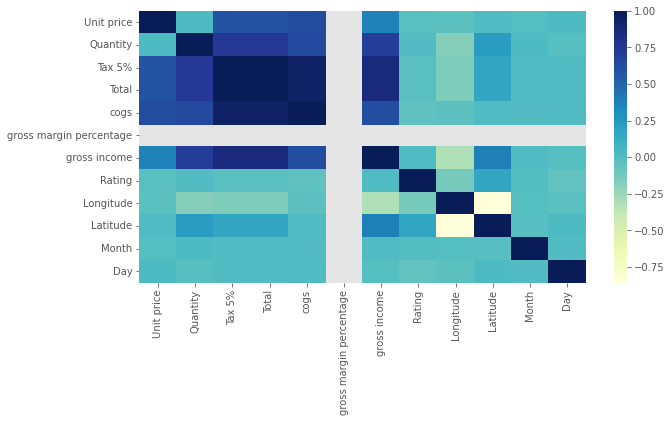

In [ ]:
# making a heatmap
sns.heatmap(sales_data_2.corr(),cmap="YlGnBu")

### Function for bivariate analysis -

#### There are 4 important metrics that can provide maximum insights in this sales data - 

#### 1. Sales 
#### 2. AOV - Average Order Value
#### 3. Mean Order Quantity
#### 4. Ratings


In [ ]:
def grouped_analysis(col,hue=None):

  def custom_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, sales_grouped['Total'].sum()*x/100)

  sales_grouped=sales_data_2[[col,"Total"]].groupby(col).sum()
  Aov=sales_data_2[[col,"Total"]].groupby(col).mean()
  Mean_ord_qty=sales_data_2[[col,"Quantity"]].groupby(col).mean()
  mean_ratings=sales_data_2[[col,"Rating"]].groupby(col).mean()

  plt.figure(figsize=(15,10))

  plt.subplot(2,2,1)
  sns.barplot(sales_grouped.index,sales_grouped.Total)
  plt.xticks(rotation=90)
  plt.title("Total sales by "+col)

  plt.subplot(2,2,2)
  plt.pie(Aov.Total,labels=Aov.index,autopct="%0.1f%%")
  plt.title("Average sales by "+col)

  plt.subplot(2,2,3)
  sns.barplot(Mean_ord_qty.index,Mean_ord_qty.Quantity)
  plt.xticks(rotation=90)
  plt.title("Average order quantity by "+col)

  plt.subplot(2,2,4)
  plt.pie(mean_ratings.Rating,labels=mean_ratings.index,autopct="%0.1f%%")
  plt.title("Average ratings by "+col)

  plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


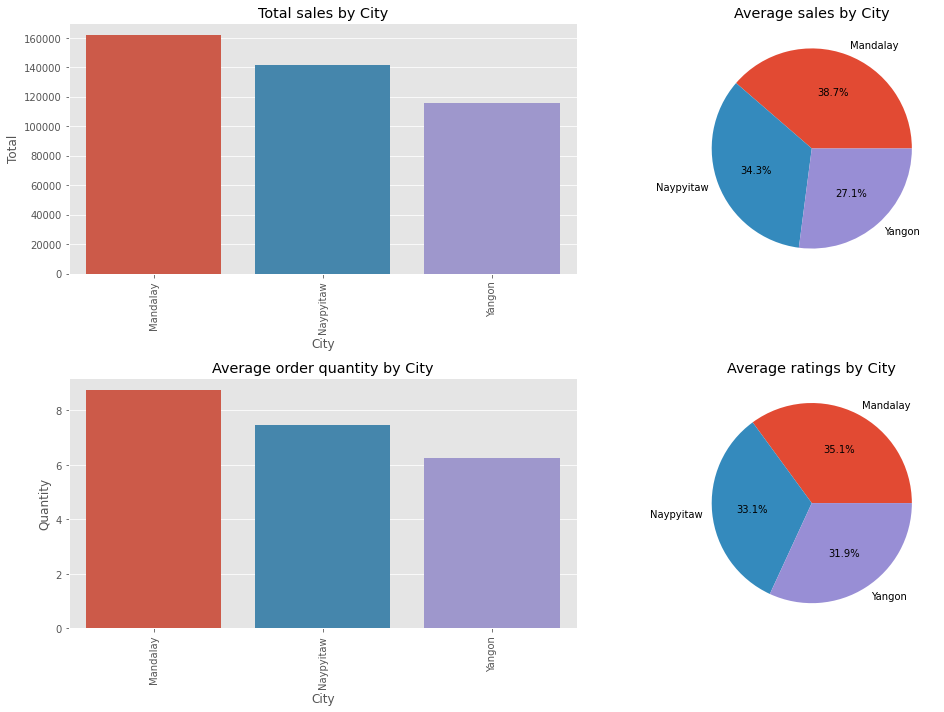

In [ ]:
grouped_analysis("City")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


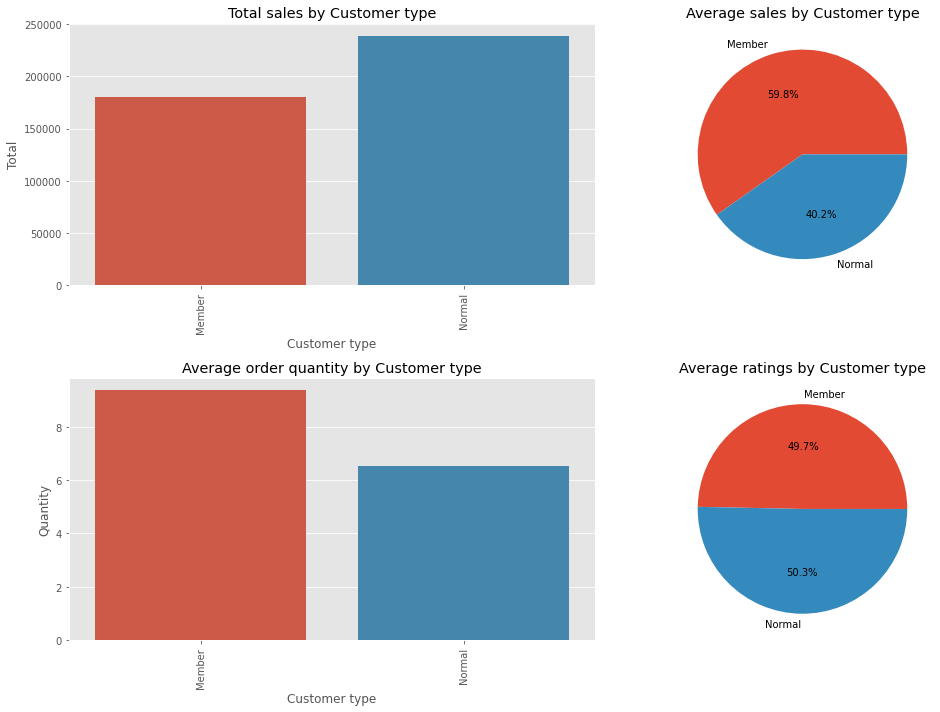

In [ ]:
grouped_analysis("Customer type")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


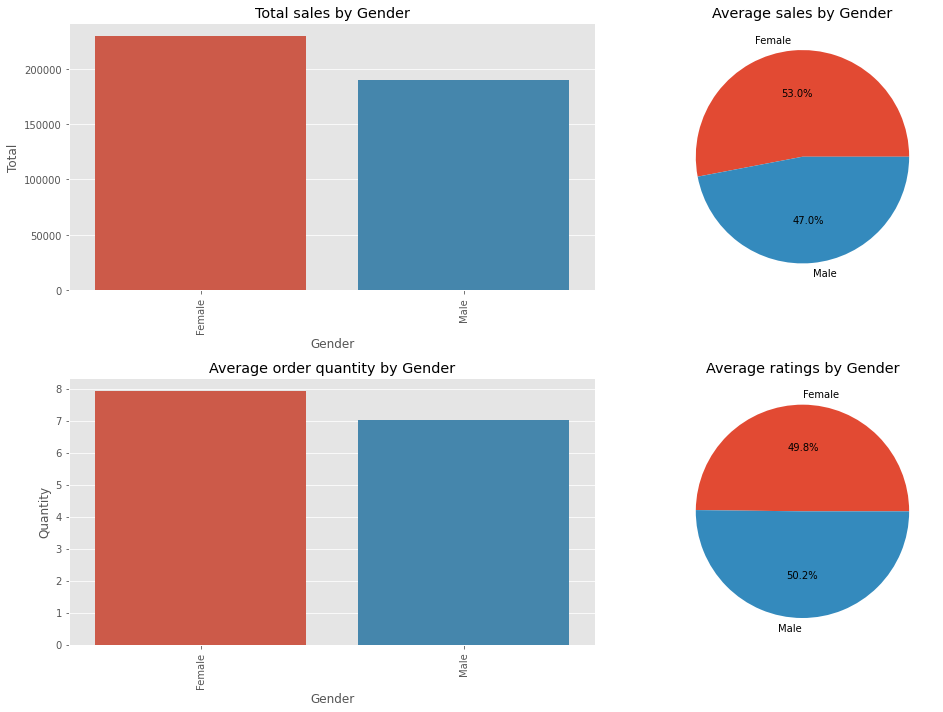

In [ ]:
grouped_analysis('Gender')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


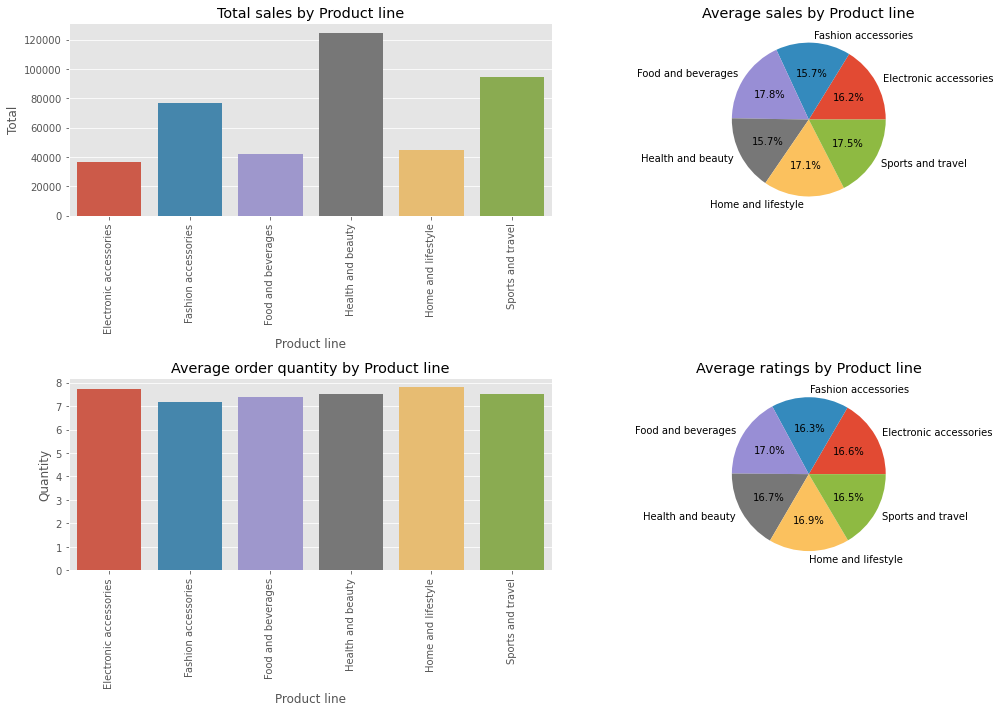

In [ ]:
grouped_analysis('Product line')

### Timeseries Analysis

##### Timeseries analysis is when a particular metric (sales/aov etc) is analysed with respect to a time variable ( day/month/year etc)

##### Although timeseries analysis is always beneficial wherever applicable, but in case of Sales related data it becomes even more valuable. 
##### This can be attributed to following reasons - 

##### * Cyclicity in sales can be visualised
##### * Seasonal sales patterns can be identified
##### * Impact of various events ( Festivals, Market collapse, Natural disasters etc. ) can be identified
##### * New strategies can be devised based on the insights to lift up sales during specific times. 
##### * Ideal promotional times can be identified.

##### Here, we will be plotting the same 4 metrics as in last sections against a time variable for our analysis -
"""

In [ ]:
# defining a function for timeseries analysis
def Timeseries_analysis(col,hue=None):


  sales_grouped=sales_data_2[[col,"Total"]].groupby(col).sum()
  Aov=sales_data_2[[col,"Total"]].groupby(col).mean()
  Mean_ord_qty=sales_data_2[[col,"Quantity"]].groupby(col).mean()
  mean_ratings=sales_data_2[[col,"Rating"]].groupby(col).mean()

  plt.figure(figsize=(15,10))

  plt.subplot(2,2,1)
  sns.barplot(sales_grouped.index,sales_grouped.Total,color="green")
  plt.xticks(rotation=90)
  plt.title("Total sales by "+col)

  plt.subplot(2,2,2)
  plt.plot(Aov.index,Aov.Total)
  plt.title("Average sales by "+col)

  plt.subplot(2,2,3)
  sns.barplot(Mean_ord_qty.index,Mean_ord_qty.Quantity,color="green")
  plt.xticks(rotation=90)
  plt.title("Average order quantity by "+col)

  plt.subplot(2,2,4)
  plt.plot(mean_ratings.index,mean_ratings.Rating)
  plt.title("Average ratings by "+col)

  plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


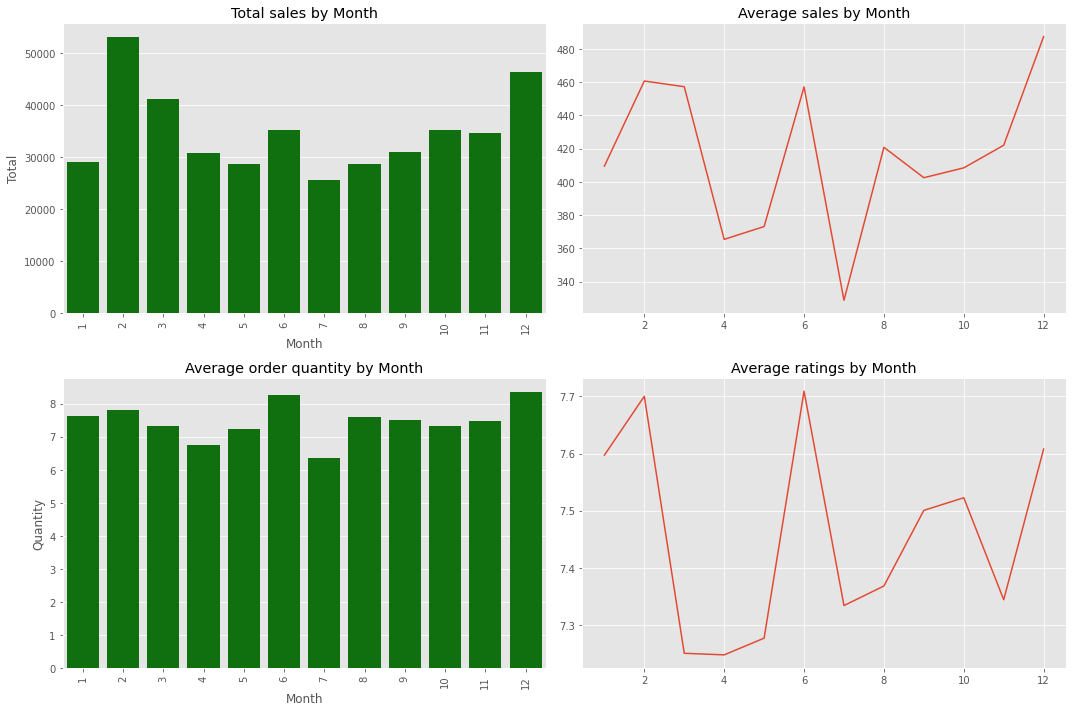

In [ ]:
Timeseries_analysis("Month")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


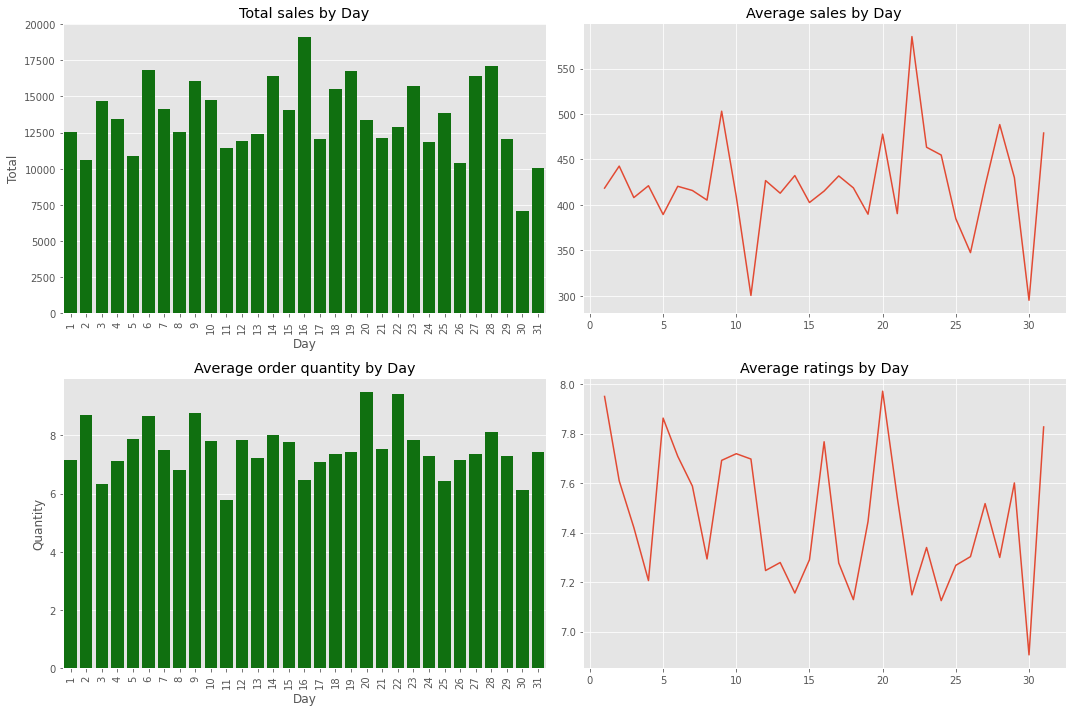

In [ ]:
Timeseries_analysis("Day")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


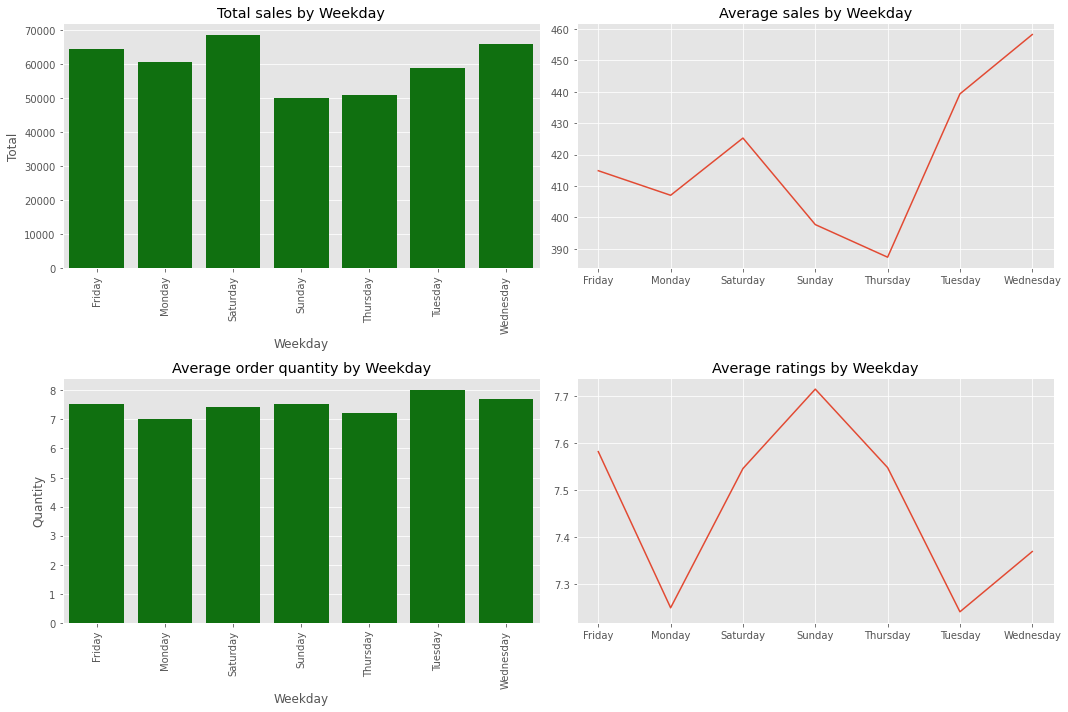

In [ ]:
Timeseries_analysis("Weekday")